In [31]:
import re
from pathlib import Path
from pprint import pp

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import (
    PredictionErrorDisplay,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from P04_ml.T00_lib.classes import MyUtil
from P04_ml.T00_lib.utils import check_jupyter


In [32]:
SAVE_DATA = False
MAKE_ONE_HOT = True

In [33]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent.parent / "P03_data_preprocess"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P03_data_preprocess"
    CURRENT_DIR = Path(__file__).resolve().parent

dt = MyUtil.get_dt()
print(f"Current Directory: {CURRENT_DIR}")
print(f"Current Date and Time: {dt}")

# Load data
df = pd.read_excel(DATA_DIR / "S06_data_combined.xlsx")
print(df.shape)
df

Code is running in a Jupyter environment.
Current Directory: c:\Users\admin\Coding\research\weld-ml\src\P04_ml\T01_ml_trial
Current Date and Time: 2026-01-04_08-11
(54, 201)


,sample_no,R,W,D,AA5052_L1,AA5052_L2,AA5052_L3,AA5052_L4,AA5052_L5,AA5052_L6,...,weld_Fz__ar_coefficient__coeff_5__k_10,"weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.4__ql_0.0","weld_Fz__fft_coefficient__attr_""real""__coeff_9","weld_Fz__fft_coefficient__attr_""angle""__coeff_26","weld_Fz__fft_coefficient__attr_""angle""__coeff_86","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.6__ql_0.2","weld_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.2",weld_Fz__ratio_beyond_r_sigma__r_2.5,weld_Fz__binned_entropy__max_bins_10,weld_Fz__kurtosis
0,1,1400,60,10,28,12,33,42,23,10,...,-0.687590,0.001825,58.401601,-59.307464,-126.394608,0.000592,0.000077,0.011999,1.996898,0.031761
1,2,1400,60,15,14,10,26,27,21,-4,...,-0.702443,0.002662,188.462577,-67.104324,-83.441169,0.001515,0.000074,0.026536,1.433742,2.139541
2,3,1400,60,20,10,14,14,25,11,3,...,-0.627446,0.002434,79.638692,-73.946166,-100.226178,0.002915,0.000764,0.046766,1.651073,1.957977
3,4,1400,70,10,10,36,22,11,14,23,...,-1.099311,-0.001110,-8.572183,-109.557287,-92.120362,-0.002131,-0.000669,0.032843,1.331185,3.615244
4,5,1400,70,15,6,14,8,7,13,12,...,-0.927360,0.002638,34.610547,142.508379,101.664911,0.005496,0.000705,0.017408,1.739714,-0.003368
5,6,1400,70,20,15,11,-13,-1,10,-20,...,-0.806930,0.001832,33.203157,-123.751781,128.992926,0.004968,0.001126,0.016870,1.817090,-0.038017
6,7,1400,80,10,63,45,24,31,19,46,...,-1.132776,0.000034,-1.471582,109.384614,-175.443311,-0.001755,0.000292,0.025228,1.565542,0.625261
7,8,1400,80,15,14,11,13,31,5,8,...,-1.131650,0.002706,4.822293,26.340215,108.289591,0.004093,0.001845,0.019793,1.799426,0.132107
8,9,1400,80,20,26,40,32,29,32,13,...,-1.122219,-0.001139,45.767693,-16.370998,-158.923540,-0.001907,-0.000349,0.017024,1.664232,-0.107983
9,10,1500,60,10,23,30,22,20,14,18,...,-0.250355,-0.000594,51.619965,-64.816764,-90.705287,-0.001537,-0.000886,0.018691,1.753247,0.097989


In [34]:
stress_patterns = [r"AA5052", r"AA6061", r"Center"]
combined_pattern = "|".join(stress_patterns)
colsY = [c for c in df.columns if re.search(combined_pattern, c)]
colsX = [c for c in df.columns if c not in colsY]
print(colsY)
print(colsX)

['AA5052_L1', 'AA5052_L2', 'AA5052_L3', 'AA5052_L4', 'AA5052_L5', 'AA5052_L6', 'AA5052_L7', 'AA6061_L1', 'AA6061_L2', 'AA6061_L3', 'AA6061_L4', 'AA6061_L5', 'AA6061_L6', 'AA6061_L7', 'Center_L1', 'Center_L2', 'Center_L3', 'Center_L4', 'Center_L5', 'Center_L6', 'Center_L7', 'AA5052_mean', 'AA6061_mean', 'Center_mean']
['sample_no', 'R', 'W', 'D', 'dwell_Fz__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"max"', 'dwell_Fz__mean_change', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_1.0__ql_0.0', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_False__qh_0.8__ql_0.0', 'dwell_Fz__agg_linear_trend__attr_"intercept"__chunk_len_10__f_agg_"var"', 'dwell_Fz__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_59', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_4', 'dwell_Fz__fft_coefficient__attr_"real"__coeff_71', 'dwell_Fz__partial_autocorrelation__lag_7', 'dwell_Fz__symmetry_looking__r_0.05', 'dwell_Fz__change_quantile

In [35]:
dfY = df[colsY]
dfX_all = df[colsX]

In [36]:
if MAKE_ONE_HOT:
    dft1 = pd.get_dummies(dfX_all, columns=["R", "W", "D"], drop_first=False, dtype=int)
    dfX = dft1.drop(columns=["sample_no"])
else:
    dfX = dfX_all.drop(columns=["sample_no"])
dfX

,"dwell_Fz__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",dwell_Fz__mean_change,"dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_1.0__ql_0.0","dwell_Fz__change_quantiles__f_agg_""mean""__isabs_False__qh_0.8__ql_0.0","dwell_Fz__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""","dwell_Fz__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6","dwell_Fz__fft_coefficient__attr_""real""__coeff_59","dwell_Fz__fft_coefficient__attr_""real""__coeff_4","dwell_Fz__fft_coefficient__attr_""real""__coeff_71",dwell_Fz__partial_autocorrelation__lag_7,...,weld_Fz__kurtosis,R_1400,R_1500,R_1600,W_60,W_70,W_80,D_10,D_15,D_20
0,-0.015598,-0.000466,-0.000466,0.001578,0.003409,0.054540,0.549447,10.030128,-0.217348,0.150247,...,0.031761,1,0,0,1,0,0,1,0,0
1,-0.001207,-0.000060,-0.000060,-0.000243,0.002961,0.066685,0.206725,20.182526,0.391966,0.016880,...,2.139541,1,0,0,1,0,0,0,1,0
2,-0.004830,-0.000198,-0.000198,-0.000230,0.004525,0.054354,0.510514,11.442374,0.742082,0.178143,...,1.957977,1,0,0,1,0,0,0,0,1
3,-0.012681,-0.000459,-0.000459,-0.001317,0.004067,0.058211,0.276479,3.854696,-0.137167,0.153629,...,3.615244,1,0,0,0,1,0,1,0,0
4,-0.028589,-0.000819,-0.000819,-0.000218,0.000968,0.055285,2.506562,24.440018,0.301666,-0.004529,...,-0.003368,1,0,0,0,1,0,0,1,0
5,-0.018737,-0.000574,-0.000574,-0.000434,-0.000147,0.067597,1.667102,66.015839,1.281509,0.052291,...,-0.038017,1,0,0,0,1,0,0,0,1
6,-0.060069,-0.001713,-0.001713,-0.001719,0.015400,0.165086,0.844323,10.311201,0.864477,0.021635,...,0.625261,1,0,0,0,0,1,1,0,0
7,-0.013660,-0.000507,-0.000507,0.000427,0.002158,0.050305,0.736753,15.078404,1.046561,0.064638,...,0.132107,1,0,0,0,0,1,0,1,0
8,-0.019998,-0.000700,-0.000700,-0.001002,0.009005,0.093126,0.907661,59.538591,1.196571,0.092022,...,-0.107983,1,0,0,0,0,1,0,0,1
9,-0.030506,-0.000834,-0.000834,0.002854,0.010522,0.094897,0.224737,28.497059,0.680593,0.162745,...,0.097989,0,1,0,1,0,0,1,0,0


In [37]:
# Extract features and targets
_X = dfX.values
_Y = dfY.values

print(_X.shape)
print(_Y.shape)

(54, 182)
(54, 24)


In [38]:
_X_train, _X_test, _Y_train, _Y_test = train_test_split(
    _X, _Y, test_size=0.2, random_state=1
)
print(_X_train.shape)
print(_X_test.shape)
print(_Y_train.shape)
print(_Y_test.shape)

(43, 182)
(11, 182)
(43, 24)
(11, 24)


In [39]:
scX = StandardScaler()
X_train = scX.fit_transform(_X_train)
X_test = scX.transform(_X_test)

scY = StandardScaler()
Y_train = scY.fit_transform(_Y_train)
Y_test = scY.transform(_Y_test)

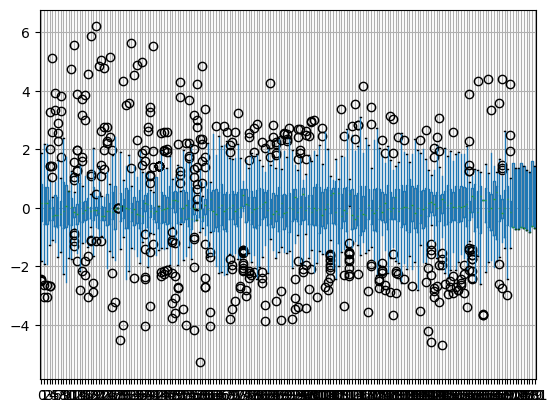

In [40]:
# _X_train.boxplot(figsize=(20,5))
pd.DataFrame(X_train).boxplot()
plt.show()

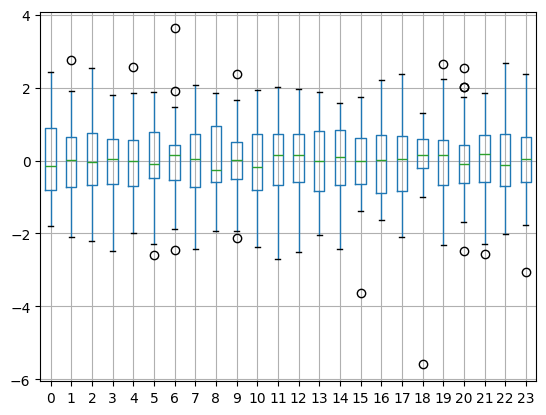

In [41]:
pd.DataFrame(Y_train).boxplot()
plt.show()

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, svd_solver="full")
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(43, 3)
(11, 3)


In [43]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# reg = MultiOutputRegressor(estimator=SVR(C=100))
# reg = MultiOutputRegressor(estimator=LinearRegression())
# reg = MultiOutputRegressor(
#     estimator=RandomForestRegressor(n_estimators=200, random_state=0)
# )
# reg = MultiOutputRegressor(
#     estimator=GradientBoostingRegressor(n_estimators=200, random_state=0, max_depth=1)
# )
reg = MultiOutputRegressor(
    estimator=XGBRegressor(n_estimators=200, random_state=0, max_depth=1)
)

In [44]:
reg.fit(X_train, Y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=1,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [45]:
Y_train_pred = reg.predict(X_train)
Y_test_pred = reg.predict(X_test)

print(Y_train_pred.shape)
print(Y_test_pred.shape)

(43, 24)
(11, 24)


In [46]:
def eval_perf(y_true, y_pred):
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    mape = mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    return mse, mape, r2


def print_perf(data):
    for k, v in data.items():
        print(k, ":", v)


data_arr = []
for i in range(0, _Y.shape[1]):
    mse_train, mape_train, r2_train = eval_perf(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    mse_test, mape_test, r2_test = eval_perf(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )

    data = {
        "Y": f"Y-{i + 1}",
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAPE Train": mape_train,
        "MAPE Test": mape_test,
        "R2 Train": r2_train,
        "R2 Test": r2_test,
    }
    # print_perf(data)

    data_arr.append(data)

mse_train, mape_train, r2_train = eval_perf(y_true=Y_train, y_pred=Y_train_pred)
mse_test, mape_test, r2_test = eval_perf(y_true=Y_test, y_pred=Y_test_pred)
print_perf(data)

data = {
    "Y": "Y-All",
    "MSE Train": mse_train,
    "MSE Test": mse_test,
    "MAPE Train": mape_train,
    "MAPE Test": mape_test,
    "R2 Train": r2_train,
    "R2 Test": r2_test,
}
data_arr.append(data)
# print_perf(data)

df_eval = pd.DataFrame.from_dict(data_arr)
display(df_eval)

if SAVE_DATA:
    filename = f"eval_{dt}.xlsx"
    df_eval.to_excel(filename, index=False)

Y : Y-24
MSE Train : 0.13066003414939714
MSE Test : 1.9371031899905697
MAPE Train : 0.9864536590745582
MAPE Test : 7.093655556510732
R2 Train : 0.8693399658506029
R2 Test : -1.262593925774817


,Y,MSE Train,MSE Test,MAPE Train,MAPE Test,R2 Train,R2 Test
0,Y-1,0.163717,1.017485,0.622832,2.553095,0.836283,-0.172087
1,Y-2,0.105977,0.661064,0.978954,14.277119,0.894023,-2.440376
2,Y-3,0.168417,1.658760,1.142111,2.261421,0.831583,-3.489032
3,Y-4,0.193169,0.786424,7.369146,1.729961,0.806831,-1.103143
4,Y-5,0.299451,0.825321,1.584700,1.821696,0.700549,-2.680275
5,Y-6,0.170253,1.123614,0.565449,2.094822,0.829747,-0.446999
6,Y-7,0.175394,1.292036,0.669389,1.018301,0.824606,-0.531775
7,Y-8,0.190707,1.999703,1.090555,2.659729,0.809293,-1.259123
8,Y-9,0.228074,1.237990,0.529614,2.714479,0.771926,-0.949238
9,Y-10,0.155938,1.413572,0.731312,1.342974,0.844062,-0.656615


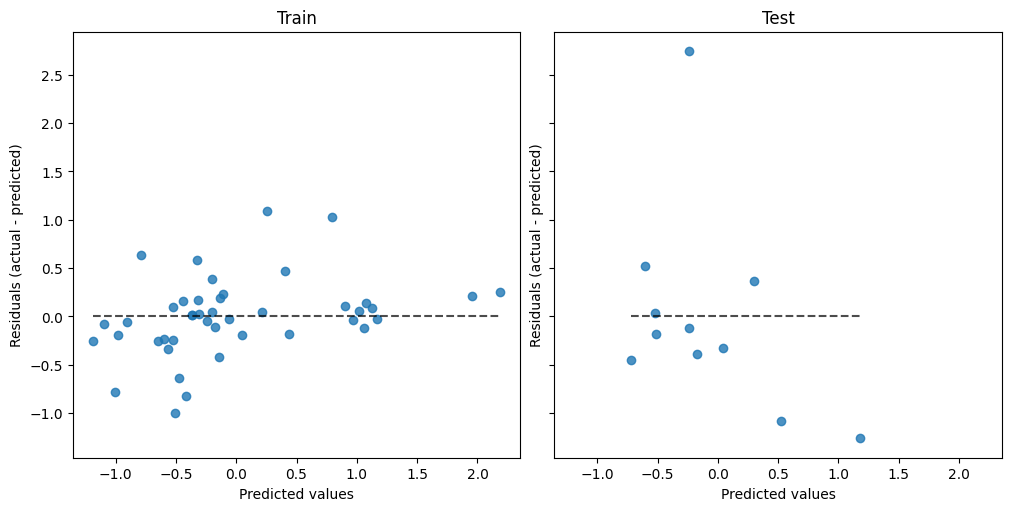

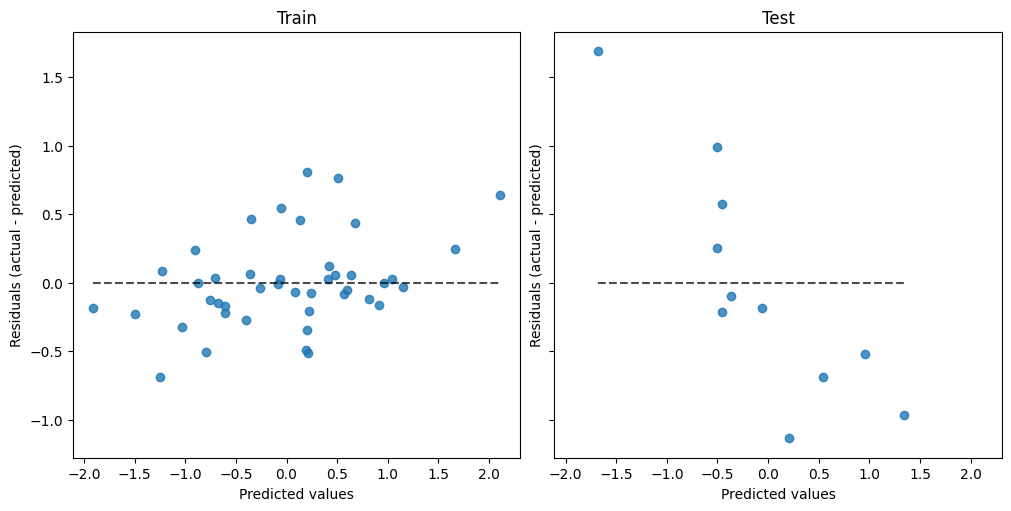

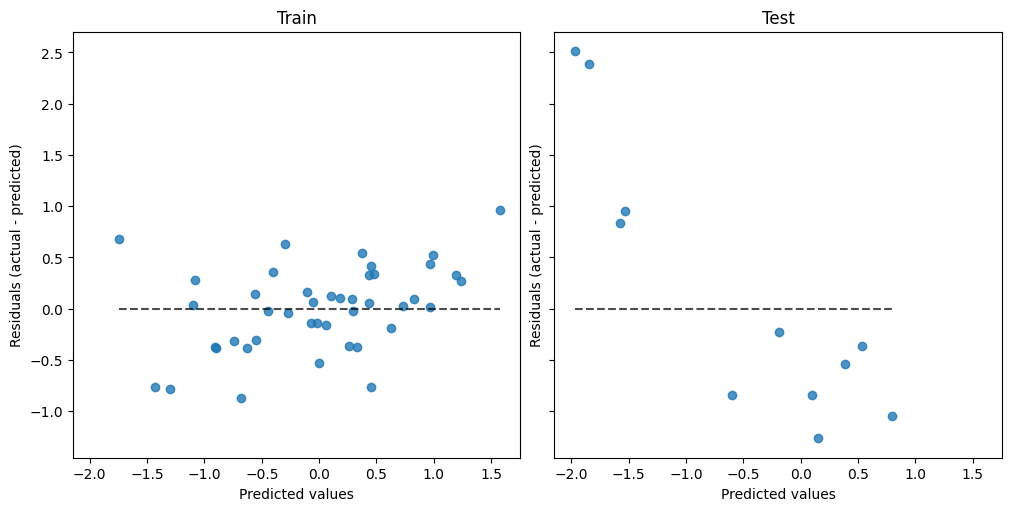

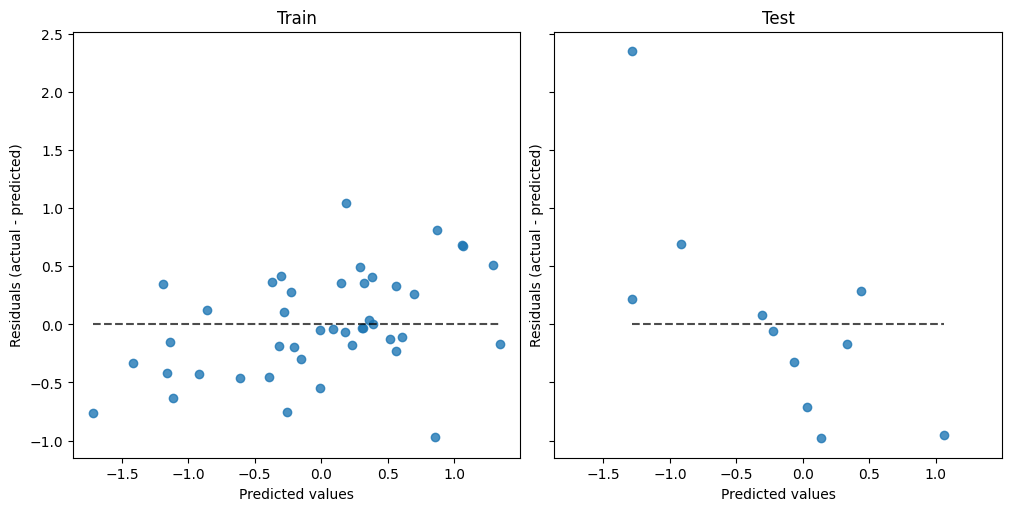

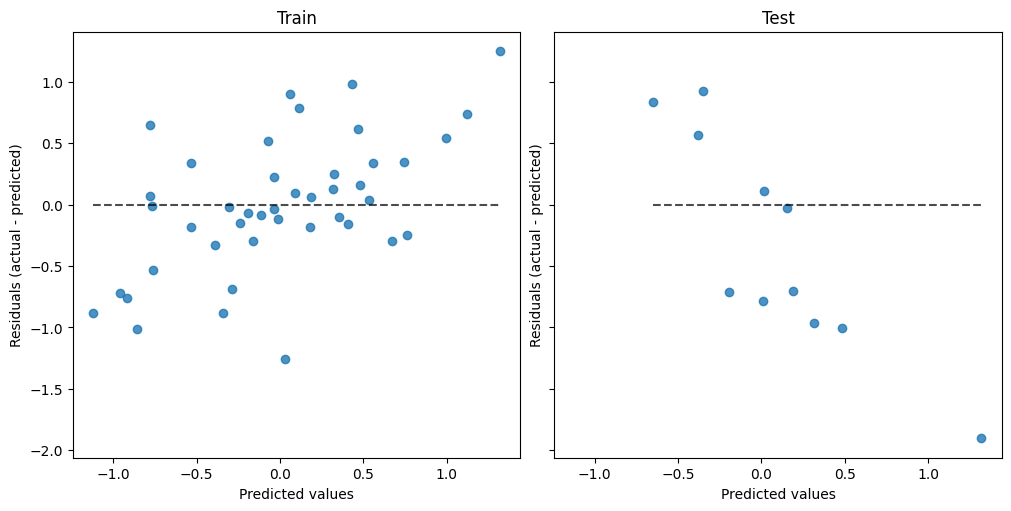

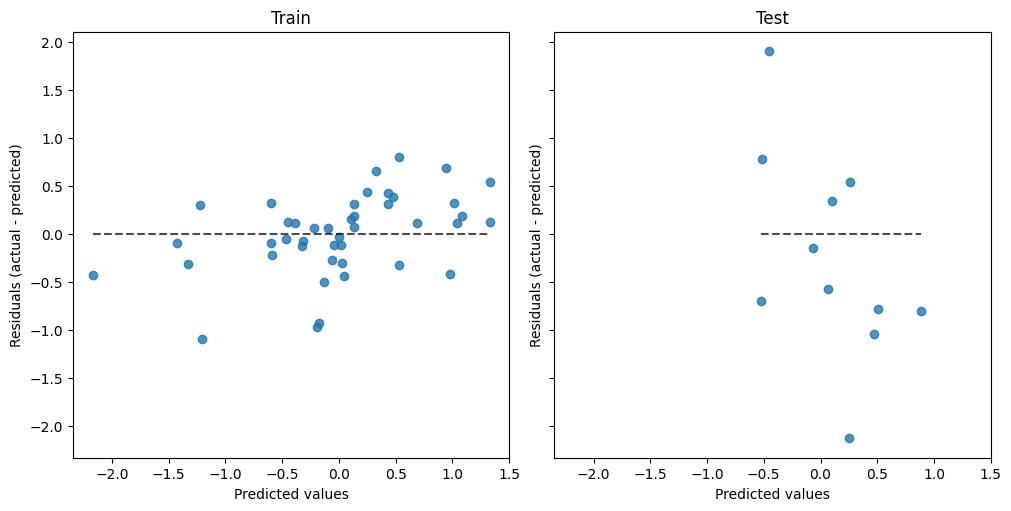

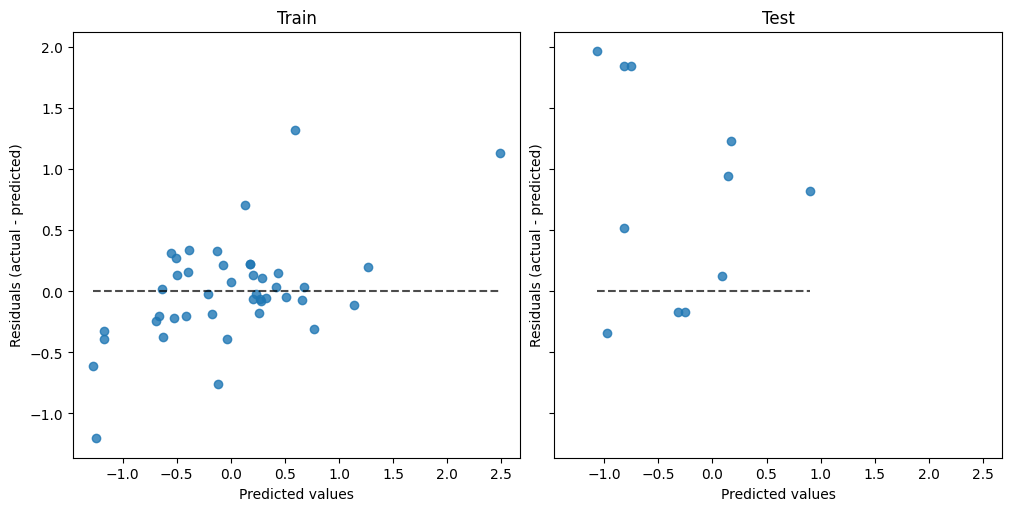

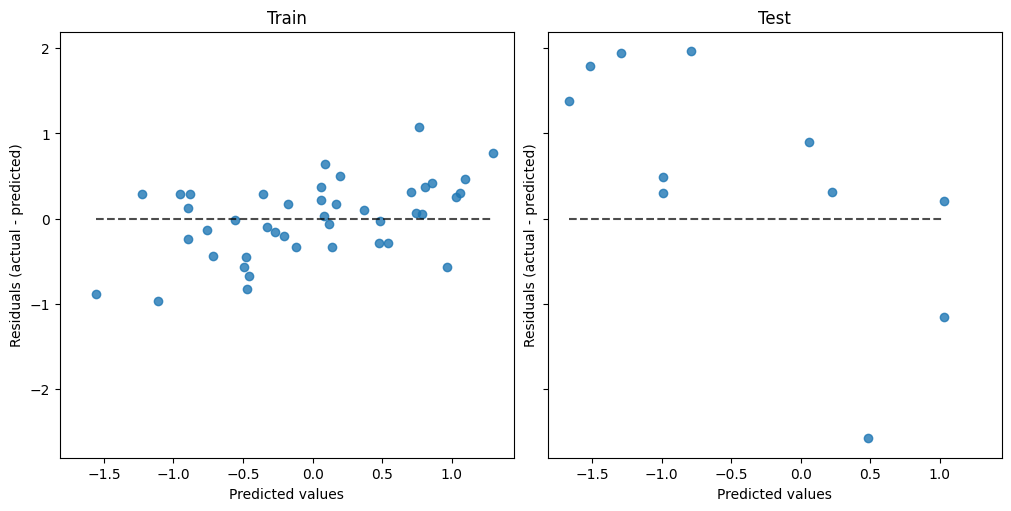

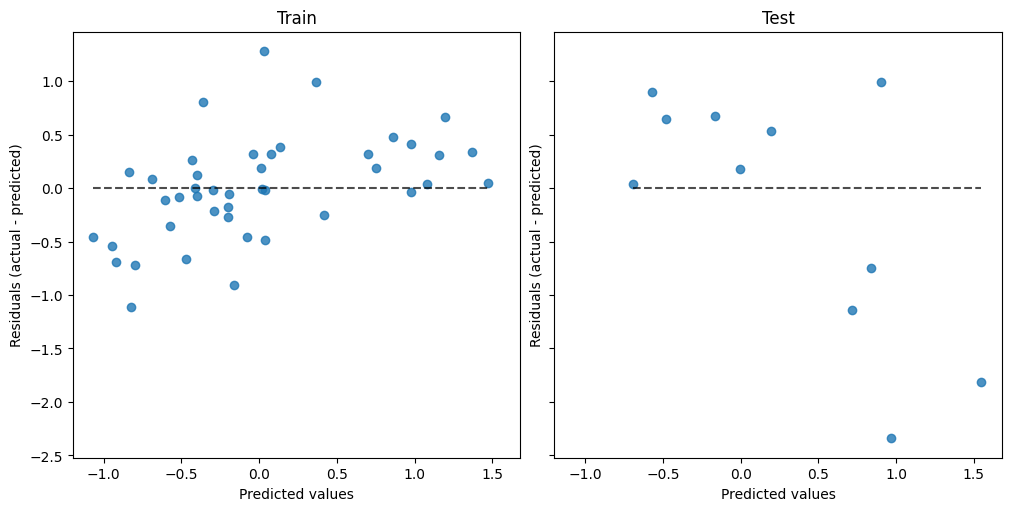

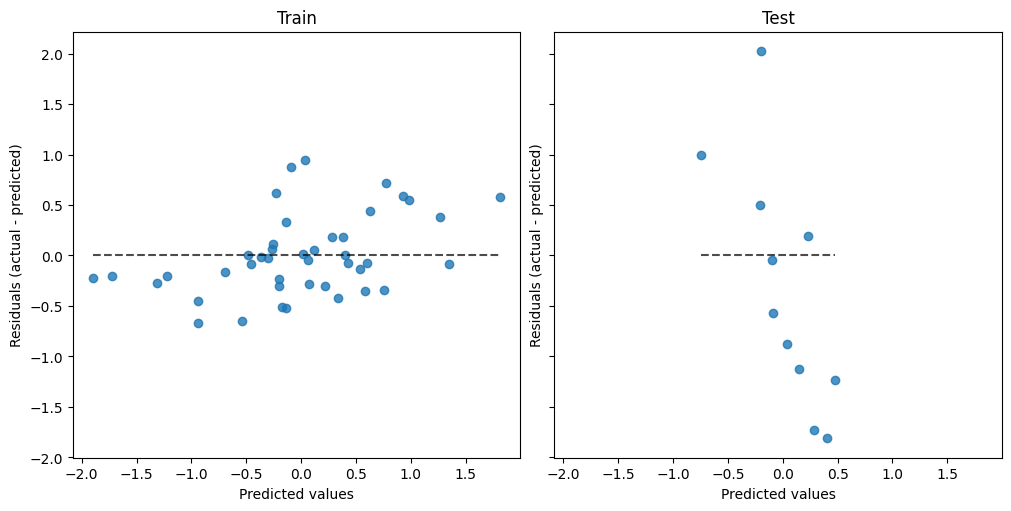

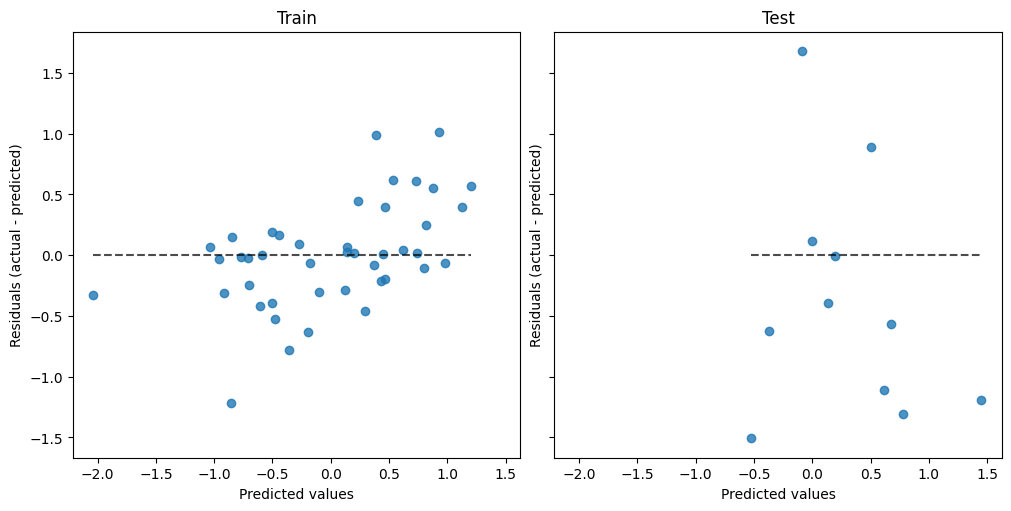

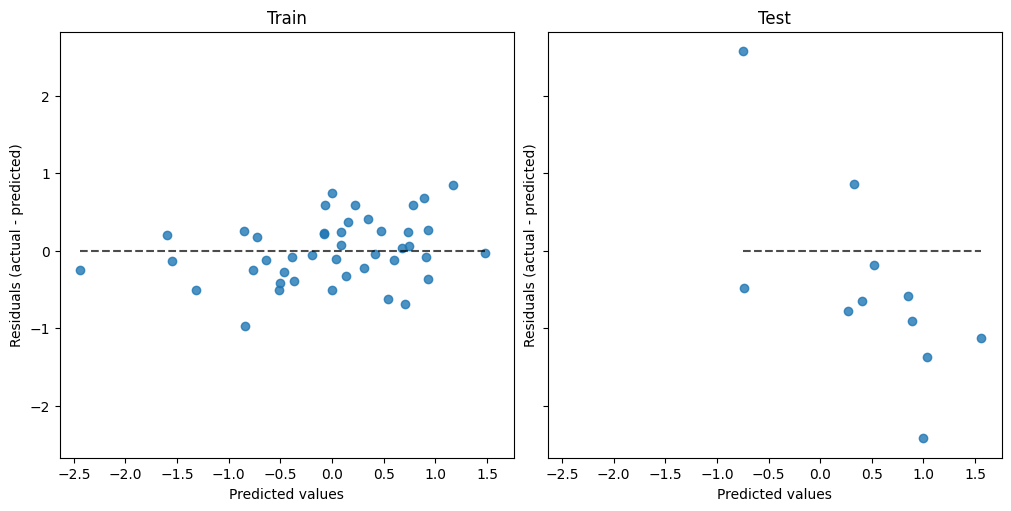

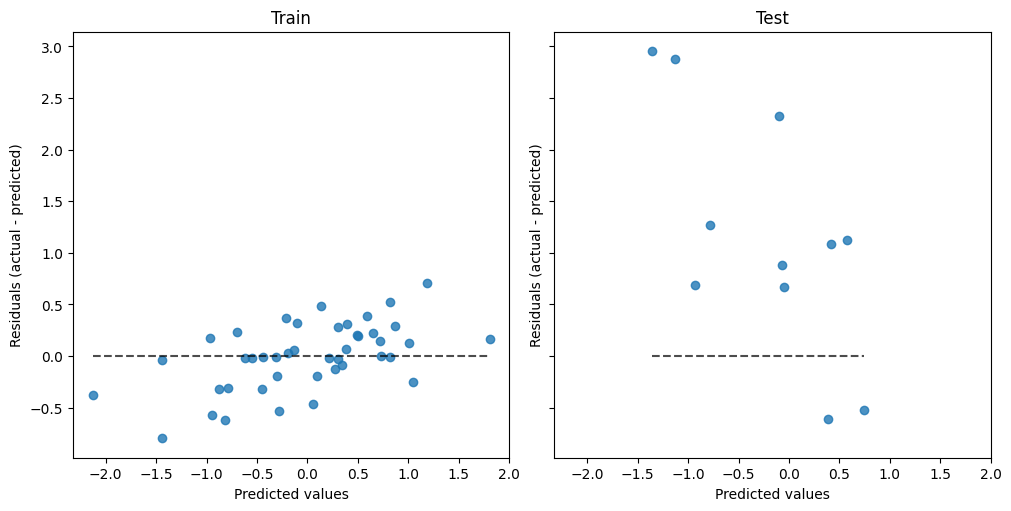

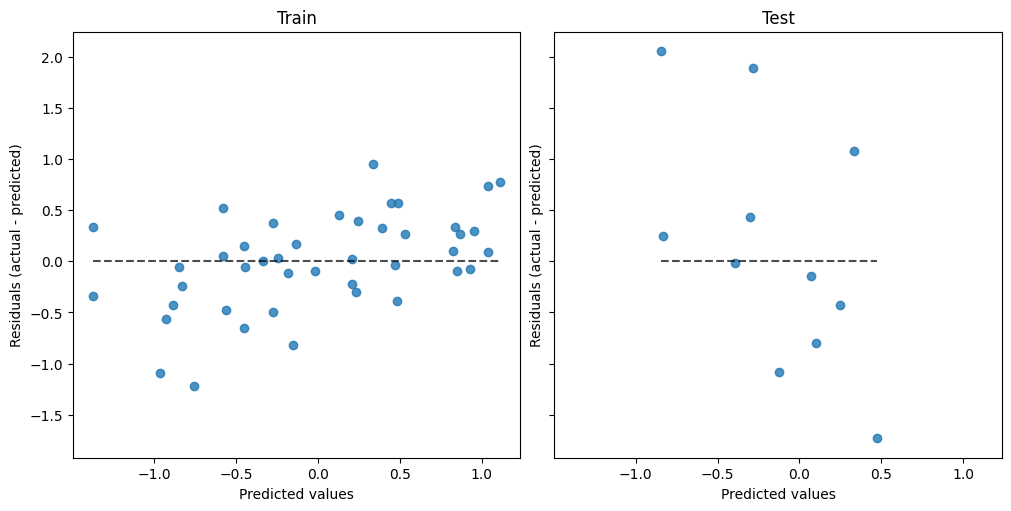

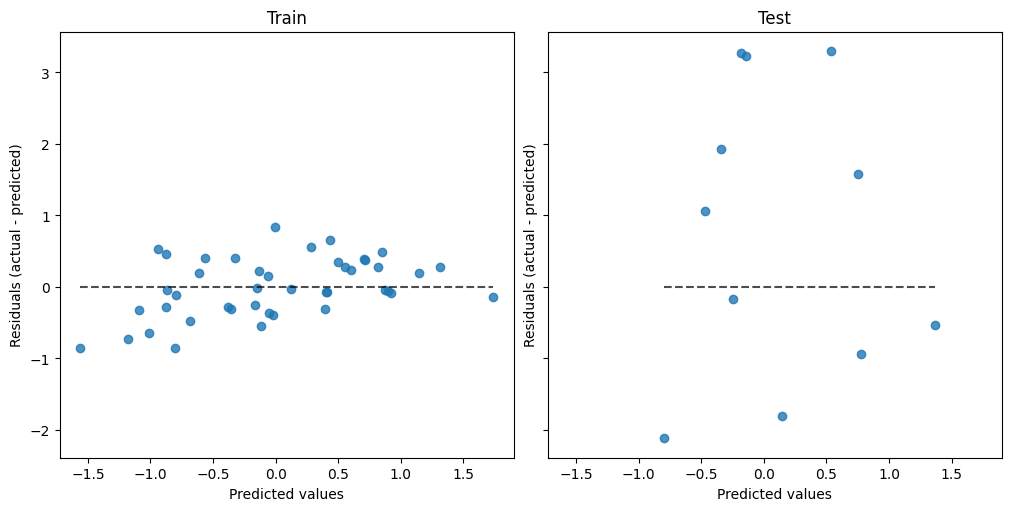

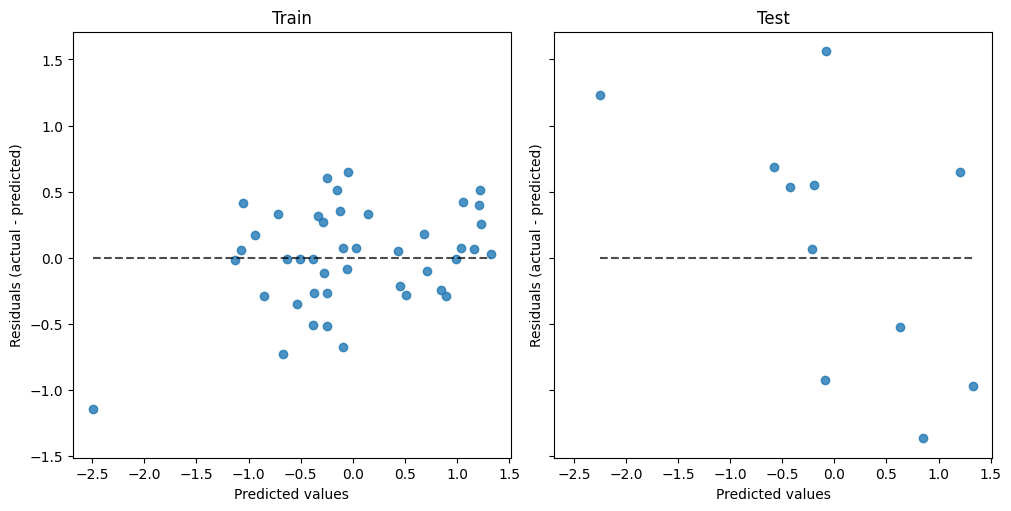

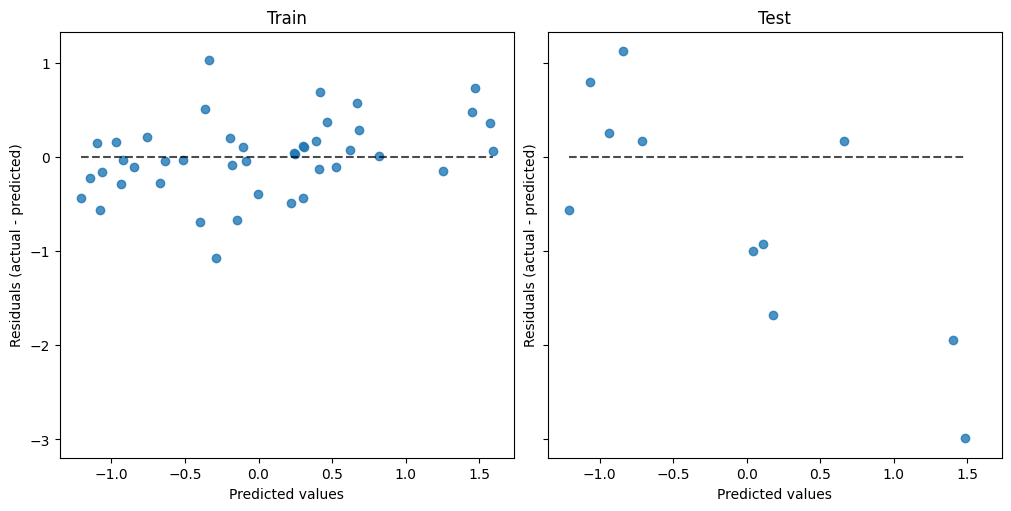

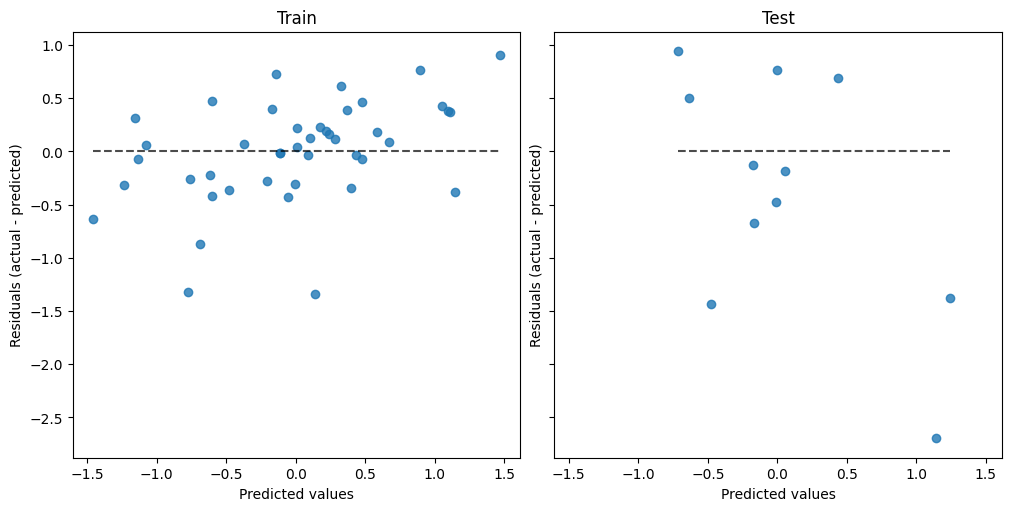

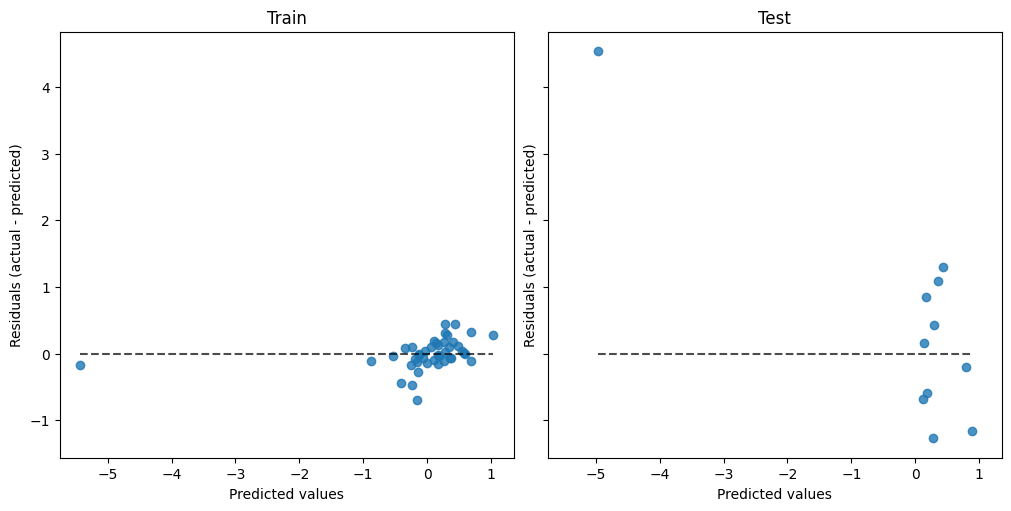

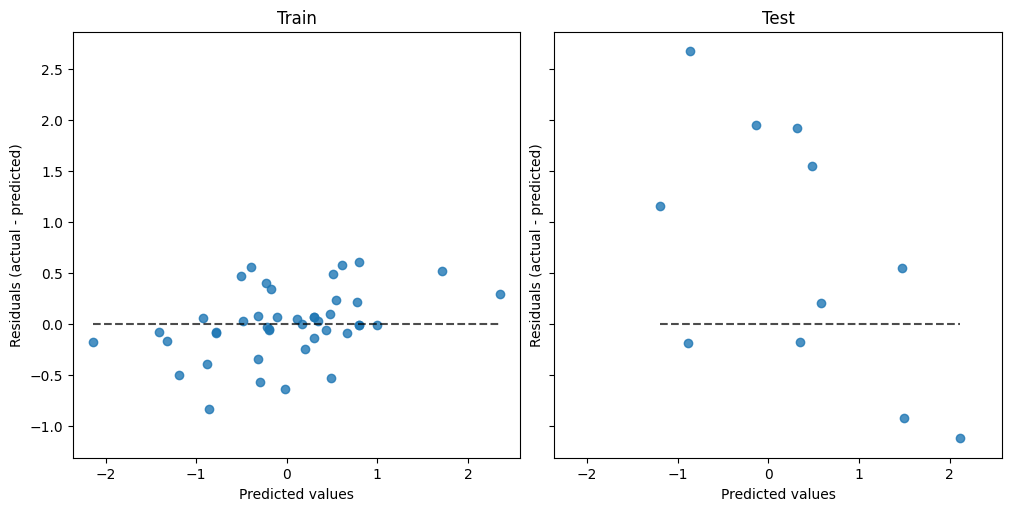

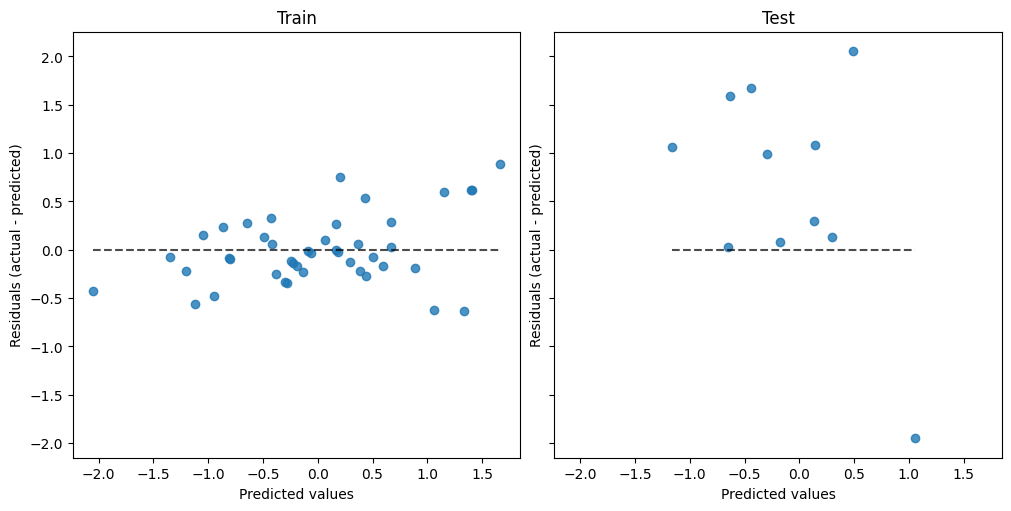

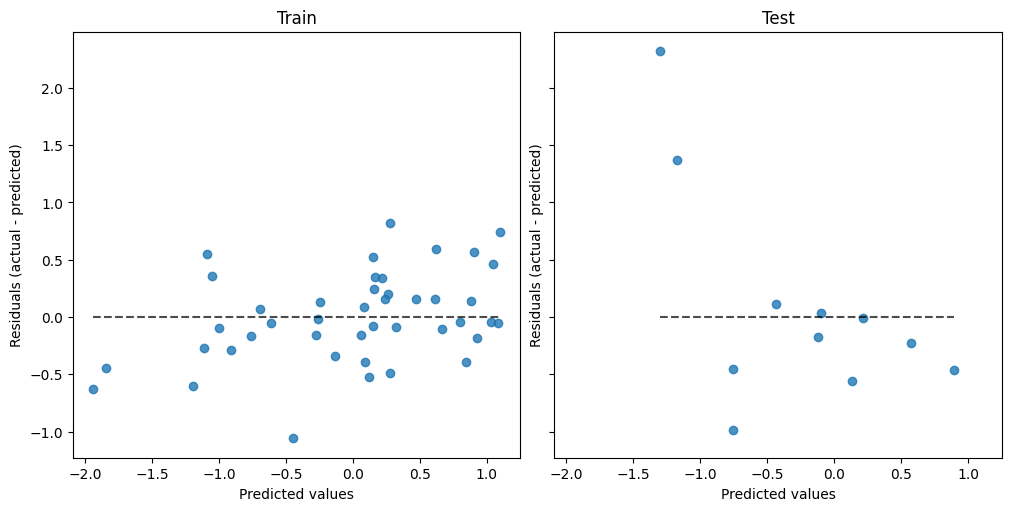

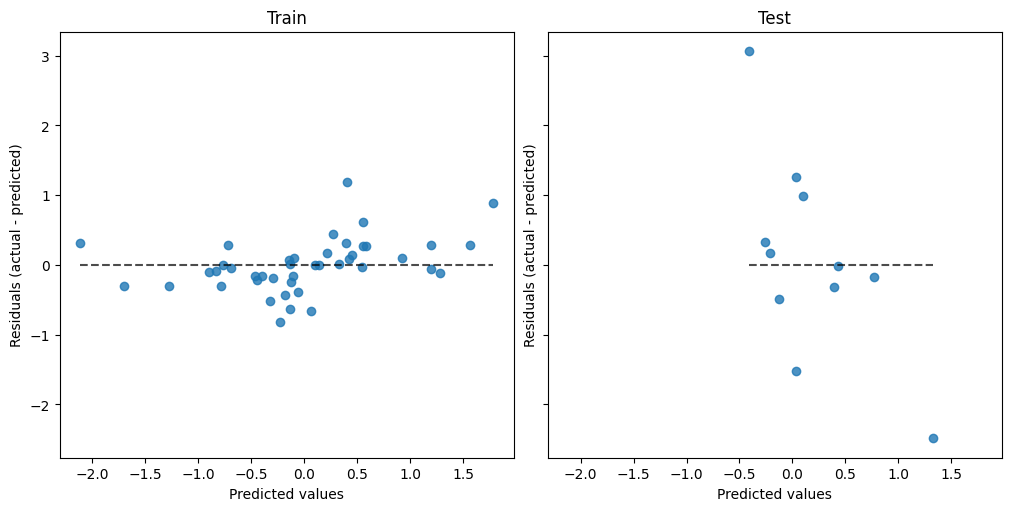

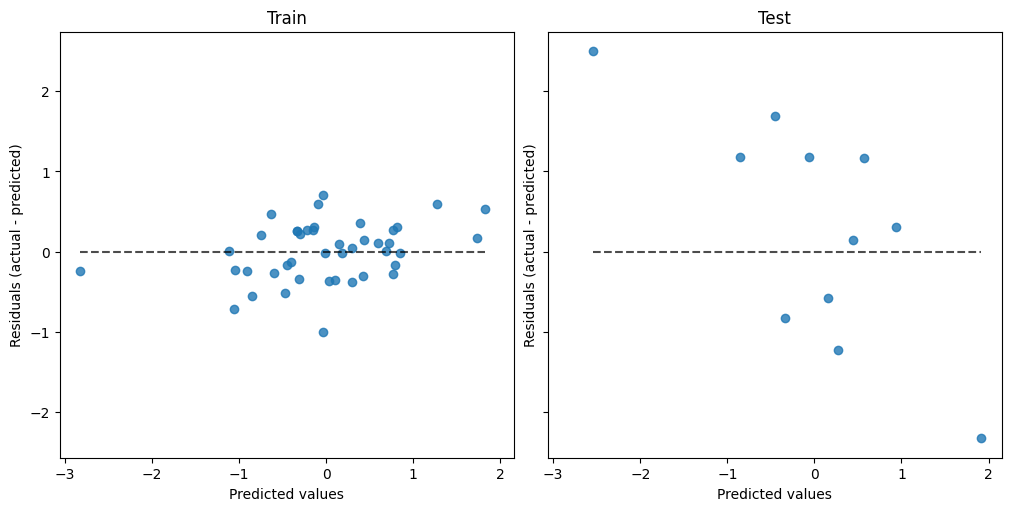

In [47]:
for i in range(0, _Y.shape[1]):
    fig, axes = plt.subplots(
        nrows=1,
        ncols=2,
        figsize=(10, 5),
        constrained_layout=True,
        sharex=True,
        sharey=True,
    )

    display_train = PredictionErrorDisplay(
        y_true=Y_train[:, i], y_pred=Y_train_pred[:, i]
    )
    display_train.plot(ax=axes[0])
    axes[0].set_title("Train")

    display_train = PredictionErrorDisplay(
        y_true=Y_test[:, i], y_pred=Y_test_pred[:, i]
    )
    display_train.plot(ax=axes[1])
    axes[1].set_title("Test")

    if SAVE_DATA:
        filename = f"res_plot_{dt}_{i}.png"
        fig.savefig(filename, dpi=300)

    plt.show()